<a href="https://colab.research.google.com/github/melvin-mango/Phishing-site-detection/blob/main/W%26B_Phishing_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree classifier to determine whether websites are legitimate or phished websites.

- We will use the urlset.csv dataset
- The model we will use is Decision Tree for classification.

#Installing and intergrating into Weights and Biases Platform

In [ ]:
!pip install wandb

In [ ]:
import wandb

In [ ]:
!wandb login

wandb: Currently logged in as: melvinlewisusiu (melvinlewisusiu-usiu). Use `wandb login --relogin` to force relogin


In [ ]:
wandb.init(project="Phishing-DecisionTrees-Regression")

In [ ]:
config = wandb.config
config.learning_rate = 0.01
config.epochs = 10

#Importing necessary libraries and the urlset dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('urlset.csv', encoding='latin-1', on_bad_lines='skip')
df.head()

<ipython-input-83-4b6023cd206f>:1: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('urlset.csv', encoding='latin-1', on_bad_lines='skip')


,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0,0.748971,1.0


#Data Evaluation and Preparation


- I used the columns mld_res and mld.ps_res to perfom cross-tabulation

In [ ]:
pd.crosstab([df['mld_res'],df['mld.ps_res']],df['label'])

label                 0.0    1.0
mld_res mld.ps_res              
0.0     0.0          8654      0
        1.0             5      0
1.0     0.0         12663      0
        1.0          9147      0
0.0     0.0          5874  37672
        1.0             9      1
1.0     0.0          5254   6378
        1.0          6403   3853

- Now we replace the 1s and 0s in our target variabl to either phishing (1) or legitimate (0) with respect to the metadata.

In [ ]:
df['label']=df['label'].replace([1],'phishing')
df['label']=df['label'].replace([0],'legitimate')
df

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729,phishing
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577,phishing
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582,phishing
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964,phishing
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,legitimate
96001,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,legitimate
96002,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,legitimate
96003,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,legitimate


- We will split the variables into X(Other columns except label and domain) and y(label)

In [ ]:
from sklearn import tree

In [ ]:
X = df.drop(columns=['label','domain'])
y = df['label']

In [ ]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729
1,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577
2,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582
3,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964
4,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971
...,...,...,...,...,...,...,...,...,...,...,...,...
96000,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906
96001,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623
96002,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571
96003,6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323


In [ ]:
y

0          phishing
1          phishing
2          phishing
3          phishing
4          phishing
            ...    
96000    legitimate
96001    legitimate
96002    legitimate
96003    legitimate
96004    legitimate
Name: label, Length: 96005, dtype: object

#Dealing with Missing values
- For the X dataset, we will fill the missing data with the mean of their respective columns
- For y, we will connect the missing values to the rows in X and remove the whole row for both X and y.

In [ ]:
# Convert relevant columns in 'X' to numeric type if they contain numbers as strings
for col in X.columns:
    if X[col].dtype == 'object':  # Check if the column is of object type (often strings)
        try:
            X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip if the column cannot be converted


X.fillna(X.mean(), inplace=True)  # Now calculate the mean and fill missing values
X.isnull().sum()

ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
dtype: int64

In [ ]:
if pd.isna(y).any():
    # Option 1: Remove rows with missing target values
    # This might reduce your dataset size
    X = X[~pd.isna(y)]
    y = y[~pd.isna(y)]


#Splitting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
65406,8419.0,1.0,0.0,3.0,40.666667,39.666667,0.022556,0.007576,0.007634,0.000000,0.714286,0.628378
21429,10000000.0,0.0,0.0,14.0,116.571429,114.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.785635
67697,14969.0,1.0,0.0,1.0,265.000000,268.000000,0.000000,0.000000,0.000000,0.000000,0.916667,0.850694
88510,10000000.0,1.0,0.0,2.0,55.500000,57.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.800000
31344,10000000.0,0.0,0.0,1.0,24.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.461538
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,10000000.0,1.0,1.0,5.0,99.000000,96.600000,0.000000,0.000000,0.000000,0.000000,0.785714,0.768535
54978,899.0,1.0,1.0,3.0,103.000000,104.000000,0.076923,0.030395,0.032258,0.031949,0.407407,0.749296
76912,74291.0,1.0,0.0,4.0,109.500000,108.750000,0.000000,0.000000,0.000000,0.000000,0.517241,0.788934
860,10000000.0,0.0,0.0,7.0,40.142857,36.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.717949


In [ ]:
X_test

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
22681,10000000.0,0.0,0.0,7.0,89.142857,86.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.652349
8760,44061.0,1.0,0.0,2.0,158.500000,161.000000,0.003135,0.000000,0.003145,0.000000,0.666667,0.794944
27362,10000000.0,0.0,0.0,7.0,279.428571,295.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.836912
83741,945653.0,1.0,0.0,3.0,52.666667,53.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.843023
80772,10000000.0,0.0,0.0,2.0,10.500000,6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.478261
...,...,...,...,...,...,...,...,...,...,...,...,...
47933,96358.0,1.0,0.0,6.0,104.666667,106.166667,0.000000,0.000000,0.000000,0.000000,0.565217,0.804565
94425,2547.0,1.0,1.0,3.0,113.000000,109.666667,0.008380,0.008621,0.008571,0.008824,0.636364,0.830137
3299,10000000.0,0.0,0.0,5.0,246.000000,261.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816166
90397,10000000.0,1.0,0.0,3.0,21.333333,15.333333,0.000000,0.000000,0.000000,0.000000,0.500000,0.594203


In [ ]:
y_train

65406    legitimate
21429      phishing
67697    legitimate
88510    legitimate
31344      phishing
            ...    
6265       phishing
54978    legitimate
76912    legitimate
860        phishing
15795      phishing
Name: label, Length: 76730, dtype: object

In [ ]:
y_test

22681      phishing
8760       phishing
27362      phishing
83741    legitimate
80772    legitimate
            ...    
47933      phishing
94425    legitimate
3299       phishing
90397    legitimate
17598      phishing
Name: label, Length: 19183, dtype: object

#Building and training of model using Logistic Regression

In [ ]:
for epoch in range(config.epochs):
  clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf=clf.fit(X_train,y_train)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
import pydotplus

In [ ]:
from IPython.display import Image

In [ ]:
dot_data= tree.export_graphviz(clf, feature_names=X.columns, class_names=['phishing','legitimate'],filled=True, out_file=None)

In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="ranking <= 3443931.75\\nentropy = 1.0\\nsamples = 76730\\nvalue = [38430, 38300]\\nclass = phishing", fillcolor="#fffffe"] ;\n1 [label="card_rem <= 9.5\\nentropy = 0.728\\nsamples = 31920\\nvalue = [25446, 6474]\\nclass = phishing", fillcolor="#eca16b"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="ratio_Rrem <= 0.25\\nentropy = 0.627\\nsamples = 30031\\nvalue = [25316, 4715]\\nclass = phishing", fillcolor="#ea985e"] ;\n1 -> 2 ;\n3 [label="entropy = 0.891\\nsamples = 1884\\nvalue = [581, 1303]\\nclass = legitimate", fillcolor="#91c9f1"] ;\n2 -> 3 ;\n4 [label="entropy = 0.533\\nsamples = 28147\\nvalue = [24735, 3412]\\nclass = phishing", fillcolor="#e99254"] ;\n2 -> 4 ;\n5 [label="card_rem <= 14.5\\nentropy = 0.362\\nsamples = 1889\\nvalue = [130, 1759]\\nclass = legitimate", fillcolor="#48a4e7"] ;\n1 -> 5 ;\n6 [label="entropy =

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

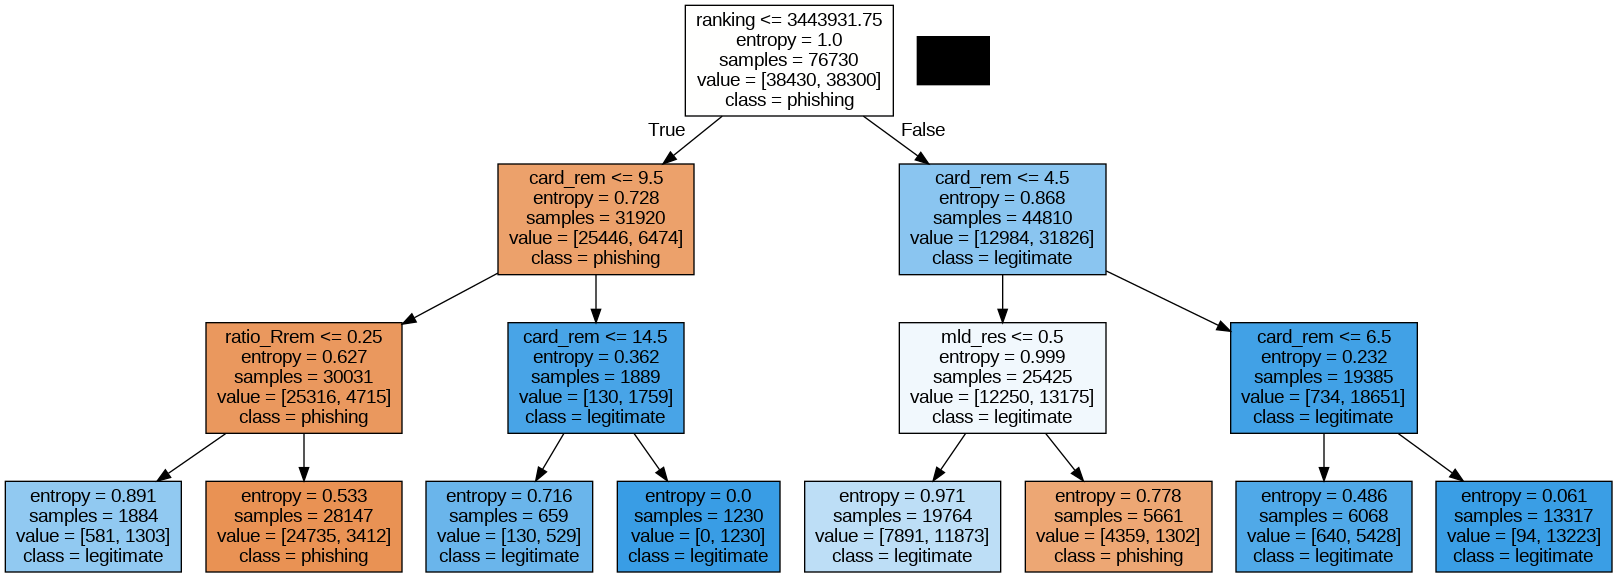

In [ ]:
graph

Image(graph.create_png())

#Model Testing

In [ ]:
predY=clf.predict(X_test)

In [ ]:
predY

array(['phishing', 'legitimate', 'phishing', ..., 'phishing',
       'legitimate', 'phishing'], dtype=object)

In [ ]:
predictions=pd.concat([y_test,pd.Series(predY,name='Predicted Class')],axis=1)
predictions

,label,Predicted Class
22681,phishing,NaN
8760,phishing,phishing
27362,phishing,NaN
83741,legitimate,NaN
80772,legitimate,NaN
...,...,...
19177,NaN,phishing
19178,NaN,legitimate
19179,NaN,legitimate
19180,NaN,phishing


#Model Performance Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_train, clf.predict(X_train))

0.8168903948911769

In [ ]:
accuracy_score(y_test,predY)

0.8155137361205234

In [ ]:
print('Accuracy on train data is %.2f' % (accuracy_score(y_train, clf.predict(X_train))))
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predY)))

Accuracy on train data is 0.82
Accuracy on test data is 0.82


In [ ]:
train_accuracy=accuracy_score(y_train, clf.predict(X_train))
test_accuracy=accuracy_score(y_test,predY)

In [ ]:
wandb.log({
        'epoch': epoch + 1,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    })

In [ ]:
wandb.finish()

epoch,▁
test_accuracy,▁
train_accuracy,▁
epoch,10
test_accuracy,0.81551
train_accuracy,0.81689
